# Problem 12.6

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.6**


**We will now compare the results of the solar irradiance components on a  35⁰-tilted plane with those obtained at the normal plane (measured using a 2-axis tracking system).**

**(a) Using the tabulated data for the solar irradiance components at the normal plane provided in the online repository of this book,  calculate the diffuse irradiance from the global and direct components and calculate the RMSE with respect to the experimentally measured diffuse irradiance.**

**(b) Calculate the percentage increase in the cumulative day irradiation of every component (global, direct and diffuse) when the irradiance values are acquired at the normal plane (using a 2-axis tracking system) with respect to a fixed plane at 35⁰.**


We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the measured solar irradiance components.

In [2]:
G_normal = pd.read_csv('data/Global_2-axis.csv', index_col=0, header=0) 
B_normal = pd.read_csv('data/Direct_2-axis.csv', index_col=0, header=0) 
D_normal = pd.read_csv('data/Diffuse_2-axis.csv', index_col=0, header=0) 

G_normal

,G(n)
time(UTC+1),
00:00,0.00
01:00,0.00
02:00,0.00
03:00,0.00
04:00,0.00
05:00,0.00
06:00,7.32
07:00,501.73
08:00,710.20


We can estimated the diffuse irradiance $D$ by substracting the direct irradiance $B$ from the global irradiance $G$.

In [3]:
D_normal_estimated = G_normal['G(n)']-B_normal['Gb(n)']
D_normal_estimated

time(UTC+1)
00:00      0.00
01:00      0.00
02:00      0.00
03:00      0.00
04:00      0.00
05:00      0.00
06:00      7.32
07:00    138.64
08:00    190.80
09:00    212.49
10:00    222.97
11:00    223.29
12:00    234.33
13:00    239.43
14:00    244.45
15:00    248.33
16:00    246.44
17:00    228.76
18:00    198.15
19:00    145.92
20:00     56.51
21:00      0.00
22:00      0.00
23:00      0.00
dtype: float64

We can plot the measured and estimated irradiance components. 

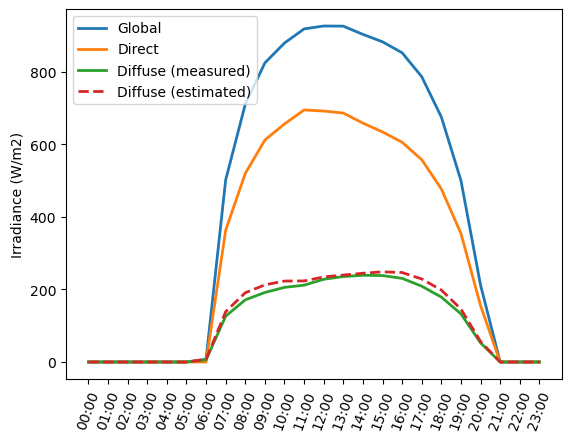

In [4]:
plt.plot(G_normal['G(n)'], 
         linewidth=2, label='Global')
plt.plot(B_normal['Gb(n)'], 
         linewidth=2, label='Direct')
plt.plot(D_normal['Gd(n)'],
         linewidth=2, label='Diffuse (measured)')
plt.plot(D_normal_estimated,
         linewidth=2, linestyle='--',label='Diffuse (estimated)')
plt.ylabel('Irradiance (W/m2)')
plt.xticks(rotation=70)
plt.legend()

We calculate the root-mean square error (RMSE) between the estimated and measured diffuse irradiance. 

In [5]:
RMSE=np.sqrt(((D_normal['Gd(n)']-D_normal_estimated)**2).mean())
RMSE
print('The RMSE is ' + str(RMSE.round(2)) + ' W/m2')

The RMSE is 10.86 W/m2


We can now retrive the solar radiation components measured on a 35$^{\circ}$ tilt plane.

In [6]:
G = pd.read_csv('data/Global_35deg.csv', index_col=0, header=0) 
B = pd.read_csv('data/Direct_35deg.csv', index_col=0, header=0) 
D = pd.read_csv('data/Diffuse_35deg.csv', index_col=0, header=0) 

Finally, we can calculate the deviation error for daily irradiation value in every component measured for the normal plane compared to the 35$^{\circ}$ tilt plane. 

In [7]:
G_diff = 100*(G_normal['G(n)'].sum()/G['G(i)'].sum()-1)
print('Global component deviation error is ' + str(G_diff.round(1)) + '%')

Global component deviation error is 49.7%


In [8]:
B_diff = 100*(B_normal['Gb(n)'].sum()/B['Gb(i)'].sum()-1)
print('Direct component deviation error is ' + str(B_diff.round(1)) + '%')

Direct component deviation error is 61.6%


In [9]:
D_diff = 100*(D_normal['Gd(n)'].sum()/D['Gd(i)'].sum()-1)
print('Diffuse component deviation error is ' + str(D_diff.round(1)) + '%')

Diffuse component deviation error is 24.3%
